### About the notebook

The purpose of this notebook is to try predicting form real world images and see if the trained models could transfer some or all of the weights. Unless the scene you constructed in Unity is accurate/big, it shouldn't be expected to perform well, as in the example here. It's still valuable to do a sanity check.

### Imports and Loading the Model

In [1]:
import pathlib
import os
from fastai.vision.all import get_image_files, PILImage, Image
import numpy as np
from matplotlib import pyplot as plt

path = pathlib.Path().absolute()
path = os.path.join(path, "Assets", "Data~")
#need this only to load the model. Without this we get an error.
def label_func(fn): return os.path.join(path,"labels",f"{fn.stem}{fn.suffix}")

In [2]:
from notebook_libs.helper_funcs import n_code, n_codes, mask_check, debug_label

In [51]:
fnames = get_image_files(os.path.join(path,"test"))
print(len(fnames))

7


#### Predicting

In [4]:
from fastai.learner import load_learner
import os

from notebook_libs.helper_funcs import show_masked_original_size, path_to_image_bytes, load_image_from_bytes, show_pred_img_original_size

_test_upload_file = ""
for root, dirs, files in os.walk(
    path, topdown=True, onerror=None, followlinks=False
):
    _test_upload_file = os.path.join(root, files[0])
model_path = os.path.join(path, "models", "unity_resnet34_256x_big")

print(model_path)
print(_test_upload_file)

/home/carrotpie/code/classB/SegmentationLearner/Assets/Data~/models/unity_resnet34_256x_big
/home/carrotpie/code/classB/SegmentationLearner/Assets/Data~/screenshots/2831.png


In [5]:
learner = load_learner(model_path)

In [39]:
def show_stacked_pred(fname):
    base_img = PILImage.create(fname)
    plt.figure(figsize=(18, 8))
    plt.subplot(131)
    plt.imshow(np.array(base_img))
    plt.subplot(132)
    show_pred_img_original_size(base_img, learner)
    plt.subplot(133)
    show_masked_original_size(base_img, learner)
    plt.show()

(256, 256)  resizing back to  (662, 1136)


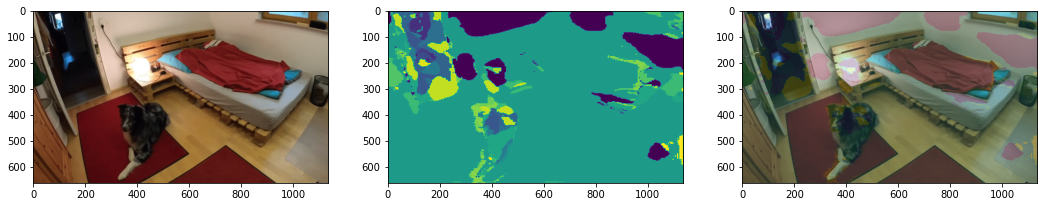

In [43]:
show_stacked_pred(fnames[0])

(256, 256)  resizing back to  (600, 1000)


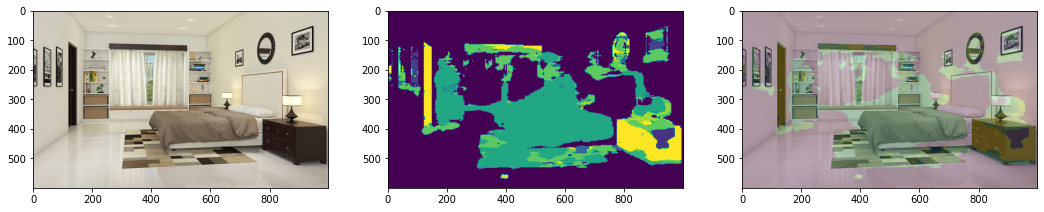

In [44]:
show_stacked_pred(fnames[1])

(256, 256)  resizing back to  (649, 1000)


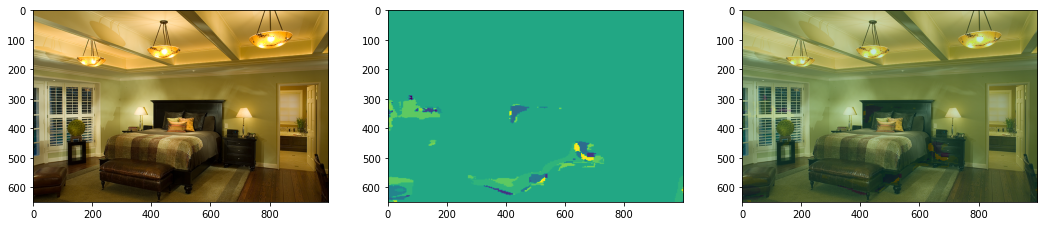

In [45]:
show_stacked_pred(fnames[2])

(256, 256)  resizing back to  (1000, 1000)


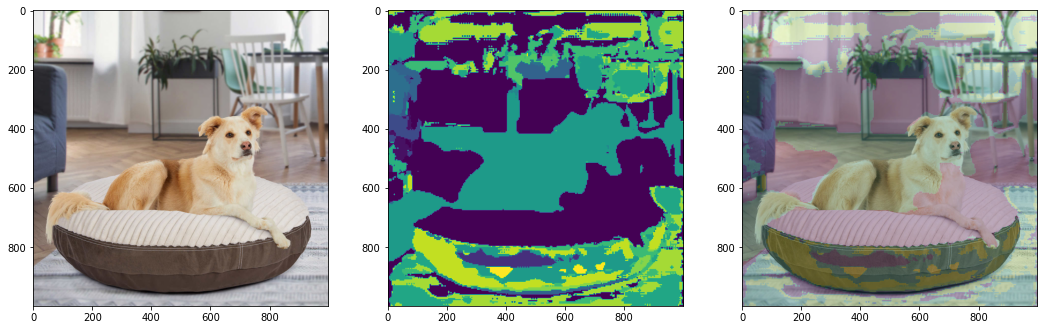

In [46]:
show_stacked_pred(fnames[3])

(256, 256)  resizing back to  (657, 1000)


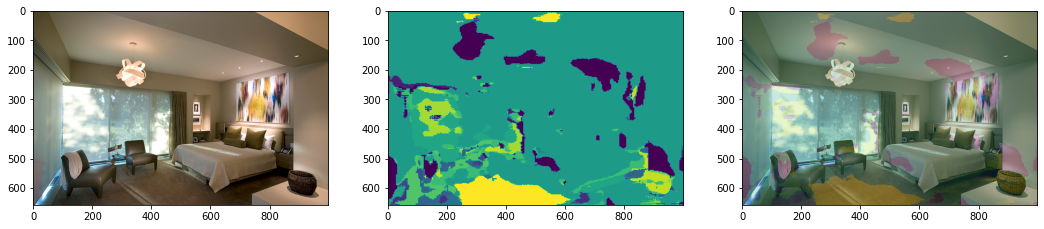

In [47]:
show_stacked_pred(fnames[4])

(256, 256)  resizing back to  (757, 1000)


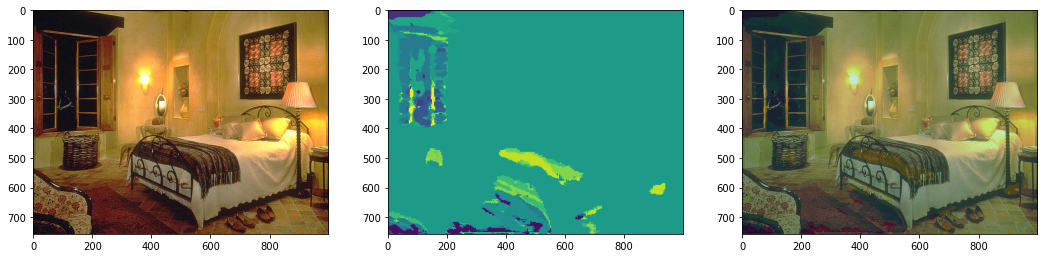

In [52]:
show_stacked_pred(fnames[5])

(256, 256)  resizing back to  (690, 1000)


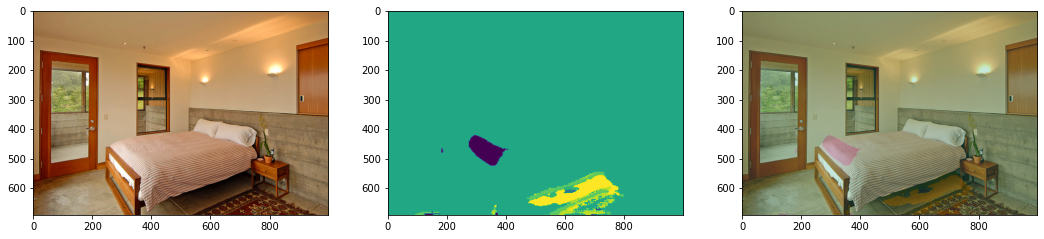

In [53]:
show_stacked_pred(fnames[6])